# CUSTOMER SEGMENTATION

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
%matplotlib inline

#plot.rcParams['figure.dpi'] = 200
pd.options.mode.chained_assignment = None 

In [ ]:
df = pd.read_csv("Data.csv", sep =',')

In [ ]:
#check total NA values for each columns
print("Feature  \t\t Nan Count   \t Pct")
for i,c in df.T.iterrows():
    count = sum(c.isna())
    count = float(count)
    if count >0:   
        print("%s   \t%5d   \t%.2f%%"  %(i, count, (count/20752)*100))

Feature  		 Nan Count   	 Pct
PROPOSAL_SUBMISSION_DATE   	 5024   	24.21%
FIRST_UW_DEC   	  336   	1.62%
LAST_UW_DEC   	  336   	1.62%
ISSUE_DATE   	  785   	3.78%
ST_DATE   	  785   	3.78%
PRODUCT_NAME_L1   	 7945   	38.29%
COVER_CAT   	20752   	100.00%
INSURED_AMT   	  443   	2.13%
PREMIUM   	 1112   	5.36%
COVER_TERM   	  962   	4.64%
PAY_TERM   	  962   	4.64%
PAY_AGE   	  962   	4.64%
COVER_AGE   	  962   	4.64%
BUYER_ID   	12617   	60.80%
OCCUPATION   	 1701   	8.20%
OCCUPATION_CLASS   	  939   	4.52%
SMOKER_STATUS   	20752   	100.00%
SMK_NO_CIG   	20752   	100.00%
HEIGHT   	 1014   	4.89%
WEIGHT   	  569   	2.74%
MEDICAL_FLAG   	20328   	97.96%
NATIONALITY_DUMMY   	   70   	0.34%
REGION_DUMMY   	  156   	0.75%
OWNER_AGE   	   24   	0.12%
OWNER_GENDER   	   27   	0.13%
OWNER_OCCUPATION   	  316   	1.52%
OWNER_OCCUPATION_CLASS   	 1016   	4.90%
AGENCY   	20752   	100.00%
CHANNEL   	20752   	100.00%
AGENT_CD_DUMMY   	 7609   	36.67%


In [ ]:
#drop columns that can be derived from other columns
# (e.g: RELATIONSHIP = RELATIONSHIP_BIN + GENDER)
# PAY_AGE = ENTRY_AGE + PAY_TERM
df_ = df.drop(['RELATIONSHIP','PAY_AGE'], axis=1)

In [ ]:
#drop all columns that have NA/NaN values >= 70%
df_ = df_.dropna(axis=1, how='all')
df_ = df_.drop('MEDICAL_FLAG', axis=1)


In [ ]:
#Drop duplicated columns which have exactly the same values
#COVER_TERM = PAY_TERM. COVER_AGE = PAY_AGE. COVER_CODE = PRODUCT_CODE
df_ = df_.drop(['COVER_TERM', 'COVER_AGE', 'COVER_CODE'], axis=1)
df_.head(5)

,POLICY_REF_DUMMY,PROPOSAL_SUBMISSION_DATE,FIRST_UW_DEC,LAST_UW_DEC,ISSUE_DATE,ST_DATE,POL_ST,QRY,PRODUCT_CATEGORY,PROD_TYPE,PRODUCT_CODE,PRODUCT_NAME_L1,PRODUCT_NAME,BASIC_COVER_TYPE,COVER_TYPE,INSURED_AMT,PREMIUM,PAY_TERM,PAY_METHOD,PAY_MODE,INSURED_ID,BUYER_ID,RELATIONSHIP_BIN,ENTRY_AGE,GENDER,OCCUPATION,OCCUPATION_CLASS,HEIGHT,WEIGHT,NATIONALITY_DUMMY,REGION_DUMMY,OWNER_AGE,OWNER_GENDER,OWNER_OCCUPATION,OWNER_OCCUPATION_CLASS,CLASS_ORDER,SERV_BRANCH_DUMMY,AGENT_CD_DUMMY
0,POLID_6930,NaN,Issued Policy (UND),OK TO ISSUE,03/19/2013,04/23/2014,SURRENDERED,UL_BASIC,Investment,UL,"2,161",Optimal Power,OPTIMAL POWER PESO,UNIT LINK,Basic,"125,000.00","100,000.00",1.0,Single Pay,Cash/Check,PART_ID_10751,NaN,SELF,34,F,PLANNER,NaN,"5,1,FI",115 P,NATIONALITY_ID_1,REGION_11,34.0,F,PLANNER,NaN,0,SERV_BRANCH_398,NaN
1,POLID_3215,06/30/2011,Tagged as OK to issue,OK TO ISSUE,06/15/2011,06/08/2011,Inforce,TRAD_BASIC,Retirement,NUL,"2,198",Velocity,5-Pay Velocity Express (Participating),ANTICIPATED ENDOWMENT,Basic,"500,000.00","161,515.00",5.0,Annual,Cash/Check,PART_ID_8104,NaN,SELF,53,F,FAMILY MEDICINE - DOCTOR,"HOSPITAL, NURSING HOME, CLINIC, ASSYLUM","5,2,FI",54 K,NATIONALITY_ID_1,REGION_2,53.0,F,FAMILY MEDICINE - DOCTOR,"HOSPITAL, NURSING HOME, CLINIC, ASSYLUM",4,SERV_BRANCH_452,AGENT_CD_58
2,POLID_7224,NaN,Issued Policy (UND),OK TO ISSUE,06/18/2013,06/17/2013,INFORCE,UL_BASIC,Investment,UL,"2,163",Optimum Gold,OPTIMUM GOLD,UNIT LINK,Basic,"562,500.00","450,000.00",1.0,Single Pay,Cash/Check,PART_ID_15437,NaN,SELF,59,F,HOUSEWIFE,NaN,"5,2,FI",140 P,NATIONALITY_ID_1,REGION_1,59.0,F,HOUSEWIFE,NaN,0,SERV_BRANCH_564,AGENT_CD_42
3,POLID_54,NaN,Tagged as OK to issue,OK TO ISSUE,12/14/2010,12/13/2010,Inforce,TRAD_BASIC,Retirement,NUL,"2,127",Velocity,5-Pay Velocity (Participating),ANTICIPATED ENDOWMENT,Basic,"100,000.00","26,745.00",5.0,Annual,Cash/Check,PART_ID_5553,PART_ID_578,CHILDREN,19,F,STUDENT,STUDENT,"5,0,FI",100 P,NATIONALITY_ID_1,REGION_10,50.0,F,BANK MANAGER,BANK,10,SERV_BRANCH_600,AGENT_CD_41
4,POLID_54,NaN,Tagged as OK to issue,OK TO ISSUE,12/14/2010,12/13/2010,Inforce,TRAD_RIDER,Protection,NUL,"1,476",NaN,Accidental Death and Dismemberment Benefit Rider,ACC DEATH & DISMEMBERMENT,Rider,"100,000.00",443,5.0,Annual,Cash/Check,PART_ID_5553,PART_ID_578,CHILDREN,19,F,STUDENT,STUDENT,"5,0,FI",100 P,NATIONALITY_ID_1,REGION_10,50.0,F,BANK MANAGER,BANK,10,SERV_BRANCH_600,AGENT_CD_41


In [ ]:
#convert to appropriate data type
#df_.info()
#int64 type
df_['PRODUCT_CODE'] = df_['PRODUCT_CODE'].fillna('')
df_['PRODUCT_CODE'] = df_['PRODUCT_CODE'].str.replace(",","")
df_['PRODUCT_CODE'] = df_['PRODUCT_CODE'].astype('int')

df_['PAY_TERM'] = df_['PAY_TERM'].fillna(df_['PAY_TERM'].median())
df_['PAY_TERM'] = df_['PAY_TERM'].astype('int')

df_['ENTRY_AGE'] = df_['ENTRY_AGE'].fillna(round(df_['ENTRY_AGE'].mean()))
df_['ENTRY_AGE'] = df_['ENTRY_AGE'].astype('int')
df_['OWNER_AGE'] = df_['OWNER_AGE'].fillna(round(df_['OWNER_AGE'].mean()))
df_['OWNER_AGE'] = df_['OWNER_AGE'].astype('int')

df_['CLASS_ORDER'] = df_['CLASS_ORDER'].astype('int')


# #float64 type
df_['INSURED_AMT'] = df_['INSURED_AMT'].str.replace(",","")
df_['INSURED_AMT'] = df_['INSURED_AMT'].astype('float')
df_['PREMIUM'] = df_['PREMIUM'].str.replace(",","")
df_['PREMIUM'] = df_['PREMIUM'].astype('float')


#df_.info()


In [ ]:
# #datetime64 type
# df_[["PROPOSAL_SUBMISSION_DATE",\
#      "ISSUE_DATE", "ST_DATE"]] = df_[["PROPOSAL_SUBMISSION_DATE", \
#                                        "ISSUE_DATE", "ST_DATE"]].apply(pd.to_datetime)

df_["PROPOSAL_SUBMISSION_DATE"] = df_["PROPOSAL_SUBMISSION_DATE"].fillna('')
df_["ISSUE_DATE"] = df_["ISSUE_DATE"].fillna('')
df_["ST_DATE"] = df_["ST_DATE"].fillna('')

count_r, count_co = df_.shape

for i in range(0, count_r):
  #print(i,c)
  if df_.iloc[i]["PROPOSAL_SUBMISSION_DATE"]=='' and df_.iloc[i]["ISSUE_DATE"]!='':
    df_.at[i,"PROPOSAL_SUBMISSION_DATE"] = df_.iloc[i]["ISSUE_DATE"]
  elif df_.iloc[i]["PROPOSAL_SUBMISSION_DATE"]!='' and df_.iloc[i]["ISSUE_DATE"]=='':
    df_.at[i,"ISSUE_DATE"] = df_.iloc[i]["PROPOSAL_SUBMISSION_DATE"]
    df_.at[i,"ST_DATE"] = df_.iloc[i]["PROPOSAL_SUBMISSION_DATE"]


In [ ]:
#convert height and weight to cm and kgs
for i in range(0, count_r):
  if 'M' in str(df_.iloc[i]["HEIGHT"]):
    df_.at[i,"HEIGHT"] = str(df_.iloc[i]["HEIGHT"]).replace(",,CM","").replace(",M","")
    if ',' in str(df_.iloc[i]["HEIGHT"]) and ',' in str(df_.iloc[i]["HEIGHT"]):
      df_.at[i,"HEIGHT"] = str(df_.iloc[i]["HEIGHT"]).replace(",","")
  else:
    df_.at[i,"HEIGHT"] = str(df_.iloc[i]["HEIGHT"]).replace(",,",",0,").replace(",FI","")
    temp = df_.at[i,"HEIGHT"].split(",")
    if len(temp) == 2:
      h_inch = float(temp[0]) * 12 + float(temp[1])
    else:
      h_inch = float(temp[0]) * 12
    h_cm = round(h_inch * 2.54,0)
    df_.at[i,"HEIGHT"] = h_cm
 
df_['HEIGHT'] = df_['HEIGHT'].astype('float')
median = float(df_['HEIGHT'].median())
df_["HEIGHT"] = np.where(df_["HEIGHT"] > median*2, median, df_['HEIGHT'])

In [ ]:
for i in range(0, count_r):
  if 'P' in str(df_.iloc[i]["WEIGHT"]):
    df_.at[i,"WEIGHT"] = str(df_.iloc[i]["WEIGHT"]).replace(" P","").replace("P","")
    try:
      df_.at[i,"WEIGHT"] = round(float(df_.at[i,"WEIGHT"]) / 2.205, 1)
    except:
      df_.at[i,"WEIGHT"] = float('NaN')
  else:
     df_.at[i,"WEIGHT"] = str(df_.iloc[i]["WEIGHT"]).replace(" K","").replace("K","")
df_['WEIGHT'] = df_['WEIGHT'].astype('float')
#df_['WEIGHT']

In [ ]:
#fill BUYER_ID of NA (SELF) with their IDs
df_["BUYER_ID"] = df_["BUYER_ID"].fillna('')
for i in range(0, count_r):
  #print(df_.iloc[i]["BUYER_ID"])
  if df_.iloc[i]["BUYER_ID"]=='':
    df_.at[i,"BUYER_ID"] = df_.iloc[i]["INSURED_ID"]


In [ ]:
m = {'m' : 1, 'f' : 0}
df_['GENDER'] = df_['GENDER'].str[0].str.lower().map(m)
df_['OWNER_GENDER'] = df_['OWNER_GENDER'].str[0].str.lower().map(m)
df_ = df_.fillna(method='ffill')
df_['OWNER_GENDER']=df_['OWNER_GENDER'].astype('int')


In [ ]:
#to uppercase so we can reduce duplicated values
df_ = df_.apply(lambda x: x.str.upper() if(x.dtype == 'object') else x)


In [ ]:
df_.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PRODUCT_CODE,20752.0,1974.497350,4.160021e+02,37.00,1562.00,2161.00,2198.0000,2414.0
INSURED_AMT,20752.0,512771.378989,1.060243e+06,500.00,118142.58,250000.00,500000.0000,31250000.0
PREMIUM,20752.0,194792.372077,6.344832e+05,-500000.00,1453.99,29410.99,166666.2525,25000000.0
PAY_TERM,20752.0,6.077727,1.343165e+01,0.00,1.00,3.00,5.0000,100.0
ENTRY_AGE,20752.0,30.918658,1.889814e+01,0.00,13.00,32.00,46.0000,75.0
GENDER,20752.0,0.429838,4.950648e-01,0.00,0.00,0.00,1.0000,1.0
HEIGHT,20752.0,148.944065,3.005801e+01,0.24,150.00,157.00,165.0000,307.0
WEIGHT,20752.0,52.849637,2.135567e+01,1.90,43.10,54.40,65.8000,200.0
OWNER_AGE,20752.0,43.509252,1.246208e+01,2.00,35.00,43.00,52.0000,93.0
OWNER_GENDER,20752.0,0.345798,4.756392e-01,0.00,0.00,0.00,1.0000,1.0


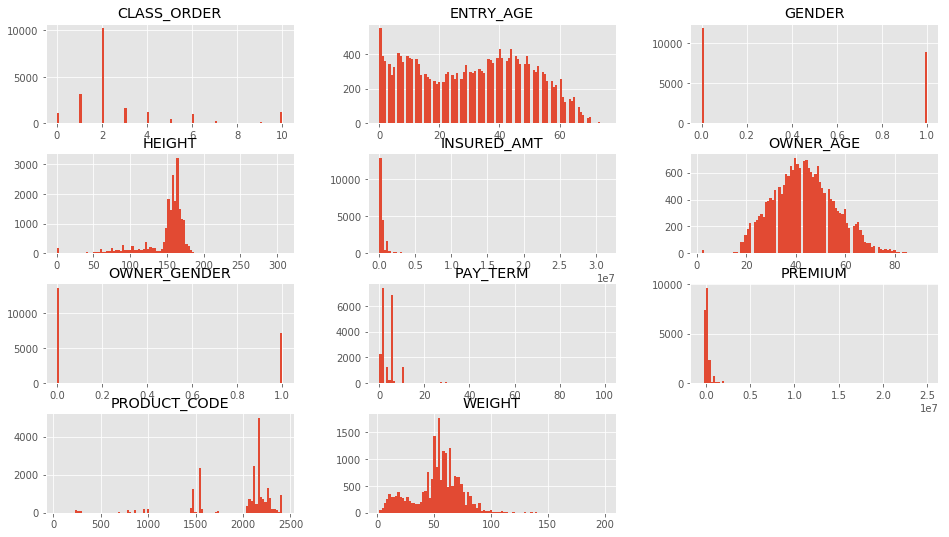

In [ ]:

plot.rcParams['figure.figsize'] = (16, 9)
plot.style.use('ggplot')
df_.hist(bins=100);

**See correlation between data**

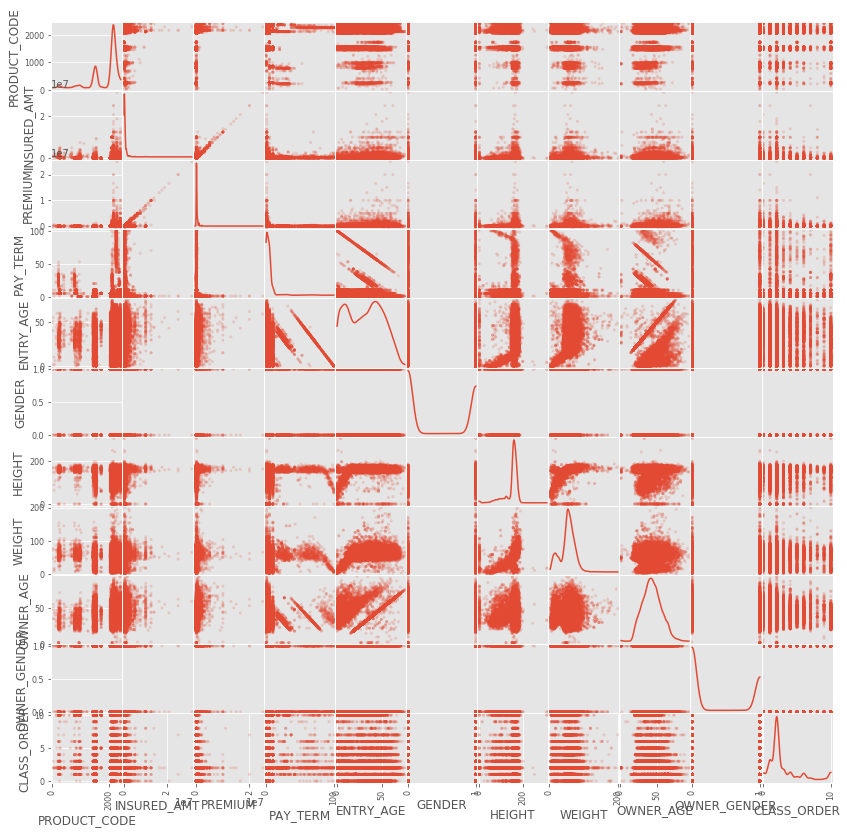

In [ ]:
#df_['PRODUCT_NAME_L1'].unique()
from pandas.plotting import scatter_matrix
scatter_matrix(df_, alpha=0.2, figsize=(14, 14), diagonal='kde');

In [ ]:
# #count on product code
# df_prod_no = df_.groupby(['BUYER_ID','OWNER_AGE','OWNER_GENDER', 'HEIGHT', 'WEIGHT', 'OWNER_OCCUPATION_CLASS'])['PRODUCT_CODE'].count()\
#         .reset_index(name="COUNT")\
#         .reindex(columns=['BUYER_ID','OWNER_AGE','OWNER_GENDER','HEIGHT', 'WEIGHT','OWNER_OCCUPATION_CLASS', 'COUNT'])
# df_recency = df_prod_no[["BUYER_ID", "OWNER_AGE", "COUNT","HEIGHT", "WEIGHT"]]
# #df_recency
# #consider no. of product bought with others like height weight age etc occupation
# #then add to this
# #consider the date of buying also

In [ ]:
#Calculate mean of each customer, each of them bought less than 2 products.
df_prod_no = df_.groupby(['BUYER_ID'])['PRODUCT_CODE'].count().reset_index(name="COUNT").reindex(columns=['BUYER_ID','COUNT'])
df_prod_no['COUNT'].mean()

1.774130118833889

In [ ]:
print(df_prod_no.describe())

              COUNT
count  11697.000000
mean       1.774130
std        1.254651
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       21.000000


In [ ]:
#Get the most purchased product_code

most_product_id = df_['PRODUCT_CODE'].value_counts().nlargest(1).index[0]
most_product_id

2163

In [ ]:
#filter the dataset by the product ID, then cluster over it
df_cluster = df_[df_['PRODUCT_CODE']==most_product_id]

df_cluster_n = df_cluster[["INSURED_AMT","PREMIUM","ENTRY_AGE", "GENDER", "HEIGHT",\
                           "WEIGHT","OWNER_GENDER", "OWNER_AGE", "PAY_TERM",\
                           "CLASS_ORDER"]]

#18.7 IN HERE
#df['GENDER']
df_cluster_n = df_cluster_n.fillna(method='ffill')
#df_cluster_n['OWNER_GENDER']=df_cluster_n['OWNER_GENDER'].astype('int')
#df_cluster_n.describe()


In [ ]:
#rescale data before clustering so the clusters\
#won't be dominated by a specific field
#from sklearn import preprocessing
# Get column names first
# names = df_cluster_n.columns
# # Create the Scaler object
# scaler = preprocessing.StandardScaler()
# scaled_df = scaler.fit_transform(df_cluster_n)
# scaled_df = pd.DataFrame(scaled_df, columns=names)
# scaled_df.describe()
#df_cluster_n["BUYER_ID"]=df_cluster['BUYER_ID']
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
names = df_cluster_n.columns
index = df_cluster_n.index
data_scaled = scaler.fit_transform(df_cluster_n)
data_scaled = pd.DataFrame(data_scaled, index=index, columns=names) 
#data_scaled = pd.concat([data_scaled,df_cluster[['BUYER_ID']]],axis=1)
#data_scaled.join(df_cluster[['BUYER_ID']])
#data_scaled["BUYER_ID"] = df_cluster["BUYER_ID"]
#data_scaled

In [ ]:
#scale-standardize
# plot.rcParams['figure.figsize'] = (16, 9)
# plot.style.use('ggplot')
# scaled_df.hist(bins=100);

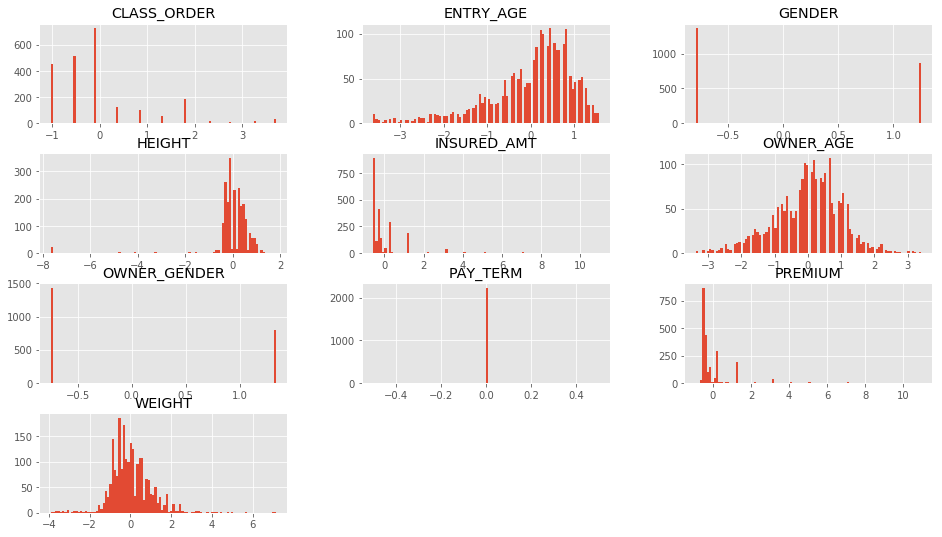

In [ ]:
#scale-normalize 0-1
plot.rcParams['figure.figsize'] = (16, 9)
plot.style.use('ggplot')
data_scaled.hist(bins=100);

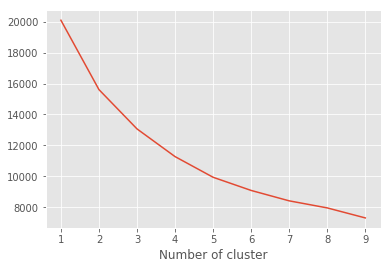

In [ ]:
#get number of optimized clusters from previous features
from sklearn.cluster import KMeans

sse={}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(data_scaled)
    data_scaled["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ 
plot.figure()
plot.plot(list(sse.keys()), list(sse.values()))
plot.xlabel("Number of cluster")
plot.show();

In [ ]:
#Choose 3
kmeans = KMeans(n_clusters=3)
#df_rec_only = df_recency[["OWNER_AGE", "COUNT","HEIGHT", "WEIGHT"]]
#df_rec_only = df_[["OWNER_AGE","HEIGHT", "WEIGHT"]]
kmeans.fit(data_scaled)
data_scaled['Cluster'] = x.predict(data_scaled)

data_scaled['BUYER_ID'] = df_cluster['BUYER_ID']

df_cluster_n["Cluster"] = data_scaled["Cluster"]

#data_scaled['OWNER_GENDER']=data_scaled['OWNER_GENDER'].astype('int')

In [ ]:
del data_scaled['clusters']
#data_scaled

In [ ]:
df_cluster_n["OWNER_OCCUPATION_CLASS"] = df_cluster["OWNER_OCCUPATION_CLASS"]
df_cluster_n['BUYER_ID']= df_cluster['BUYER_ID']

In [ ]:
df_cluster_n.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
INSURED_AMT,2233.0,465905.725481,643567.961396,93750.0,125000.0,250000.0,625000.0,7500000.0
PREMIUM,2233.0,372635.014778,514919.226572,-100000.0,100000.0,200000.0,500000.0,6000000.0
ENTRY_AGE,2233.0,48.870578,13.464369,0.0,43.0,52.0,58.0,70.0
GENDER,2233.0,0.390058,0.487872,0.0,0.0,0.0,1.0,1.0
HEIGHT,2233.0,158.357891,20.466936,1.5,155.0,160.0,166.0,196.0
WEIGHT,2233.0,63.241043,15.221651,3.8,54.4,61.2,72.0,172.0
OWNER_GENDER,2233.0,0.358710,0.479729,0.0,0.0,0.0,1.0,1.0
OWNER_AGE,2233.0,52.901478,11.217153,15.0,46.0,54.0,60.0,91.0
PAY_TERM,2233.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
CLASS_ORDER,2233.0,2.163905,2.113916,0.0,1.0,2.0,2.0,10.0


In [ ]:
df_cluster_n.to_csv('cluster.csv', index=False)

In [ ]:
data_scaled.head(5)

,INSURED_AMT,PREMIUM,ENTRY_AGE,GENDER,HEIGHT,WEIGHT,OWNER_GENDER,OWNER_AGE,PAY_TERM,CLASS_ORDER,Cluster,BUYER_ID
2,0.150125,0.150280,0.752482,-0.799688,-0.066360,0.017016,-0.747902,0.543800,0.0,-1.023877,1,PART_ID_15437
6,0.247262,0.247405,0.826768,1.250488,0.568953,0.614983,1.337073,0.632969,0.0,-1.023877,0,PART_ID_10642
18,-0.529831,-0.529590,-1.178973,1.250488,0.226861,1.101241,1.337073,-1.774598,0.0,-0.077554,2,PART_ID_11969
23,-0.170425,-0.170230,0.678195,-0.799688,-0.066360,0.772688,-0.747902,0.454631,0.0,-1.023877,1,PART_ID_11297
24,-0.490976,-0.490740,0.678195,-0.799688,-0.066360,1.416652,-0.747902,0.454631,0.0,-1.023877,1,PART_ID_11297


In [ ]:
# plot.scatter(df_cluster_n['INSURED_AMT'],df_cluster_n['Cluster'])

# plot.show()
# plot.scatter(df_cluster_n['ENTRY_AGE'],df_cluster_n['Cluster'])

# plot.show()
# plot.scatter(df_cluster_n['HEIGHT'],df_cluster_n['Cluster'])

# plot.show()
# plot.scatter(df_cluster_n['WEIGHT'],df_cluster_n['Cluster'])

# plot.show()

# plot.scatter(df_cluster_n['CLASS_ORDER'],df_cluster_n['Cluster'])
# plot.show()

# plot.scatter(df_cluster_n['OWNER_AGE'],df_cluster_n['Cluster'])
# plot.show()


In [ ]:
kmeans.cluster_centers_

array([[-0.06970254, -0.06951978,  0.50861109,  1.22149547,  0.47624727,
         0.62193214,  1.15174225,  0.50020623,  0.        , -0.23049468,
         0.02020202],
       [-0.30136223, -0.30149748, -0.16199529, -0.6860946 , -0.16833808,
        -0.42607532, -0.6491499 , -0.13584579,  0.        , -0.27037008,
         1.65862377],
       [ 0.60052843,  0.60062677, -0.11387683,  0.26348886, -0.07653003,
         0.27289479,  0.25248195, -0.15442754,  0.        ,  0.67308398,
         5.71567044]])

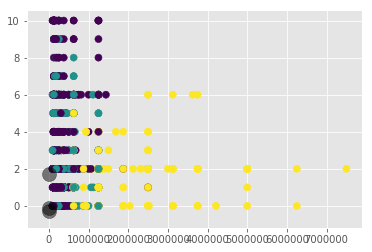

In [ ]:
plot.scatter(df_cluster_n['INSURED_AMT'], df_cluster_n['CLASS_ORDER'], c=data_scaled['Cluster'], s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plot.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

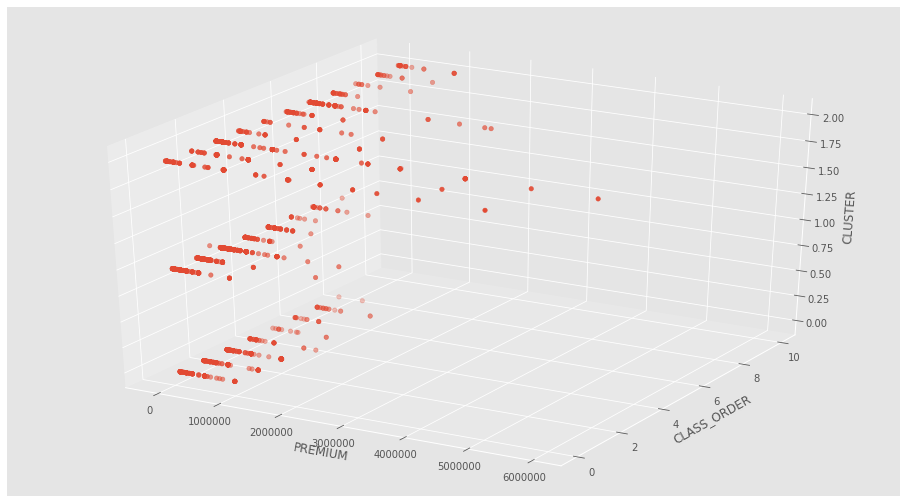

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plot.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df_cluster_n['PREMIUM'], df_cluster_n['CLASS_ORDER'], df_cluster_n['Cluster'])
ax.set_xlabel('PREMIUM')
ax.set_ylabel('CLASS_ORDER')
ax.set_zlabel('CLUSTER')
plot.show()

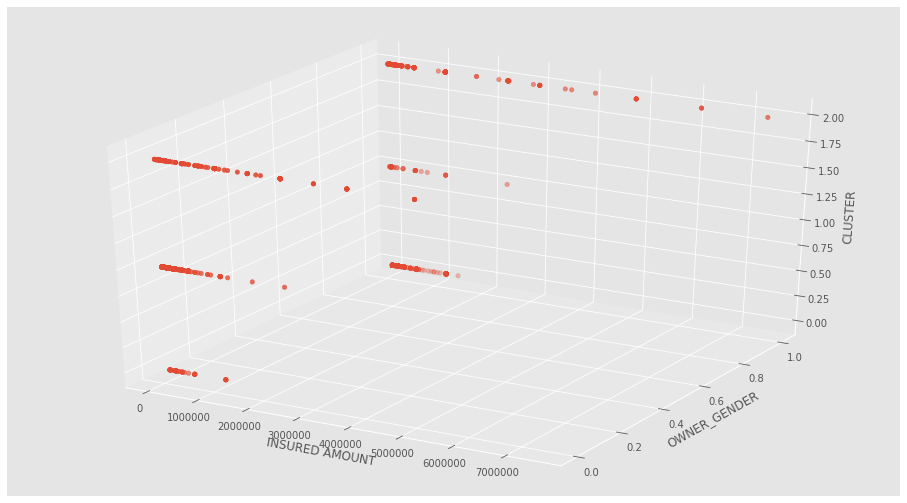

In [ ]:
#Female: 0, Male: 1
from mpl_toolkits.mplot3d import Axes3D
fig = plot.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df_cluster_n['INSURED_AMT'], df_cluster_n['OWNER_GENDER'], df_cluster_n['Cluster'])
ax.set_xlabel('INSURED AMOUNT')
ax.set_ylabel('OWNER_GENDER')
ax.set_zlabel('CLUSTER')
plot.show()

# ax.set_xlabel('X Label')
# ax.set_ylabel('Y Label')
# ax.set_zlabel('Z Label')

# plot.show();

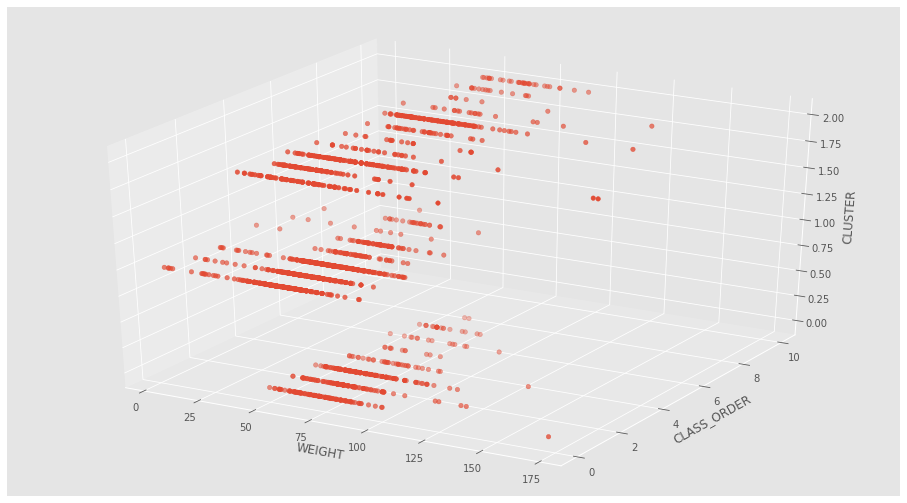

In [ ]:
fig = plot.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df_cluster_n['WEIGHT'], df_cluster_n['CLASS_ORDER'], df_cluster_n['Cluster'])
ax.set_xlabel('WEIGHT')
ax.set_ylabel('CLASS_ORDER')
ax.set_zlabel('CLUSTER')
plot.show()

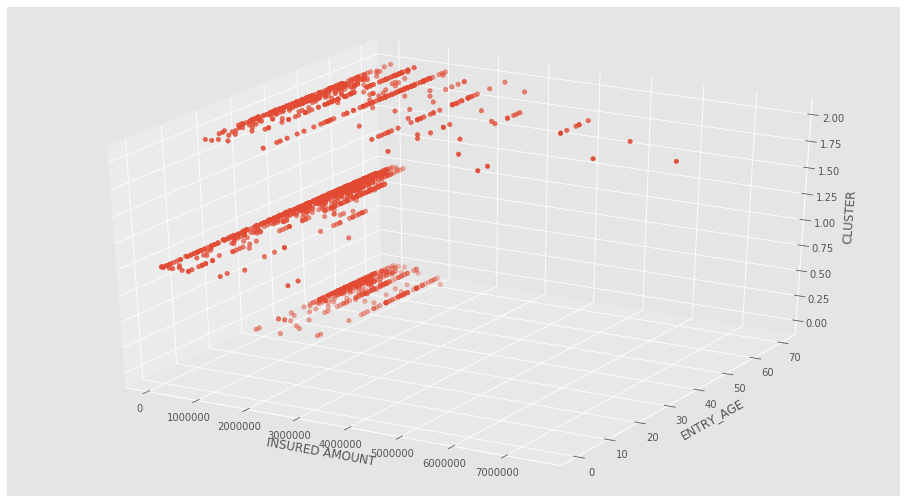

In [ ]:

fig = plot.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df_cluster_n['INSURED_AMT'], df_cluster_n['ENTRY_AGE'], df_cluster_n['Cluster'])
ax.set_xlabel('INSURED AMOUNT')
ax.set_ylabel('ENTRY_AGE')
ax.set_zlabel('CLUSTER')
plot.show()

In [ ]:
max_cluster_gender = df_cluster_n.groupby(['GENDER','Cluster'])['Cluster'].count().reset_index(name="COUNT").reindex(columns=['GENDER','Cluster','COUNT'])
max_cluster_gender

,GENDER,Cluster,COUNT
0,0,0,11
1,0,1,1137
2,0,2,214
3,1,0,749
4,1,1,29
5,1,2,93


In [ ]:
max_cluster_gender = df_cluster_n.groupby(['OWNER_GENDER','Cluster'])['Cluster'].count().reset_index(name="COUNT").reindex(columns=['OWNER_GENDER','Cluster','COUNT'])
max_cluster_gender

,OWNER_GENDER,Cluster,COUNT
0,0,0,185
1,0,1,796
2,0,2,451
3,1,0,278
4,1,1,14
5,1,2,509


In [ ]:
max_cluster_class_order = df_cluster_n.groupby(['CLASS_ORDER','Cluster'])['Cluster'].count().reset_index(name="COUNT").reindex(columns=['CLASS_ORDER','Cluster','COUNT'])
max_cluster_class_order = max_cluster_class_order[max_cluster_class_order["Cluster"]==1]
max_cluster_class_order

,CLASS_ORDER,Cluster,COUNT
1,0,1,249
4,1,1,306
7,2,1,394
10,3,1,62
13,4,1,71
16,5,1,9
19,6,1,26
22,7,1,1
26,10,1,1


In [ ]:
centers[:, 1]

array([-0.06951978, -0.30149748,  0.60062677])

In [ ]:

df_cluster_n["Cluster"] = data_scaled["Cluster"]
df_cluster_n["OCCUPATION_CLASS"] = df_cluster["OCCUPATION_CLASS"]

In [ ]:
df_cluster_n["OWNER_OCCUPATION_CLASS"] = df_cluster["OWNER_OCCUPATION_CLASS"]

In [ ]:
max_cluster_class = df_cluster_n.groupby(['OWNER_OCCUPATION_CLASS','Cluster'])['Cluster'].count().reset_index(name="COUNT").reindex(columns=['OWNER_OCCUPATION_CLASS','Cluster','COUNT'])
print(max_cluster_class[max_cluster_class["Cluster"]==2])

                         OWNER_OCCUPATION_CLASS  Cluster  COUNT
2                                    ACCOUNTANT        2      2
4                                   AGRICULTURE        2     11
7                            AIR TRANSPORTATION        2      7
9                                     ARCHITECT        2      3
11                 BAKERIES (FACTORIES & SHOPS)        2      1
14                                         BANK        2     36
21                 BUSINESSMAN/ / BUSINESSWOMAN        2    132
26                                       CASINO        2      5
30                            COMPUTER INDUSTRY        2      1
33                                   CONTRACTOR        2      1
39                                       DENTAL        2      3
44                                       DRIVER        2      3
47                          ELECTRICAL INDUSTRY        2      2
50                         ELECTRONICS INDUSTRY        2      1
53                                     E

In [ ]:
#one-hot encoder -> k means, if have time will implement later
# from sklearn.preprocessing import StandardScaler, OneHotEncoder

# columns_to_encode = ['OCCUPATION_CLASS']
# columns_to_scale  = ['INSURED_AMT', 'PREMIUM', 'ENTRY_AGE', 'OWNER_AGE', 'HEIGHT', 'WEIGHT', 'CLASS_ORDER']
# df_cluster_n['OCCUPATION_CLASS'] = df_cluster_n['OCCUPATION_CLASS'].fillna('')
# # Instantiate encoder/scaler
# scaler = StandardScaler()
# ohe    = OneHotEncoder(sparse=False)

# # Scale and Encode Separate Columns
# scaled_columns  = scaler.fit_transform(df_cluster_n[columns_to_scale]) 
# encoded_columns =    ohe.fit_transform(df_cluster_n[columns_to_encode])

# # Concatenate (Column-Bind) Processed Columns Back Together
# processed_data = np.concatenate([scaled_columns, encoded_columns], axis=1)
# processed_data.shape

# scaled_columns.shape

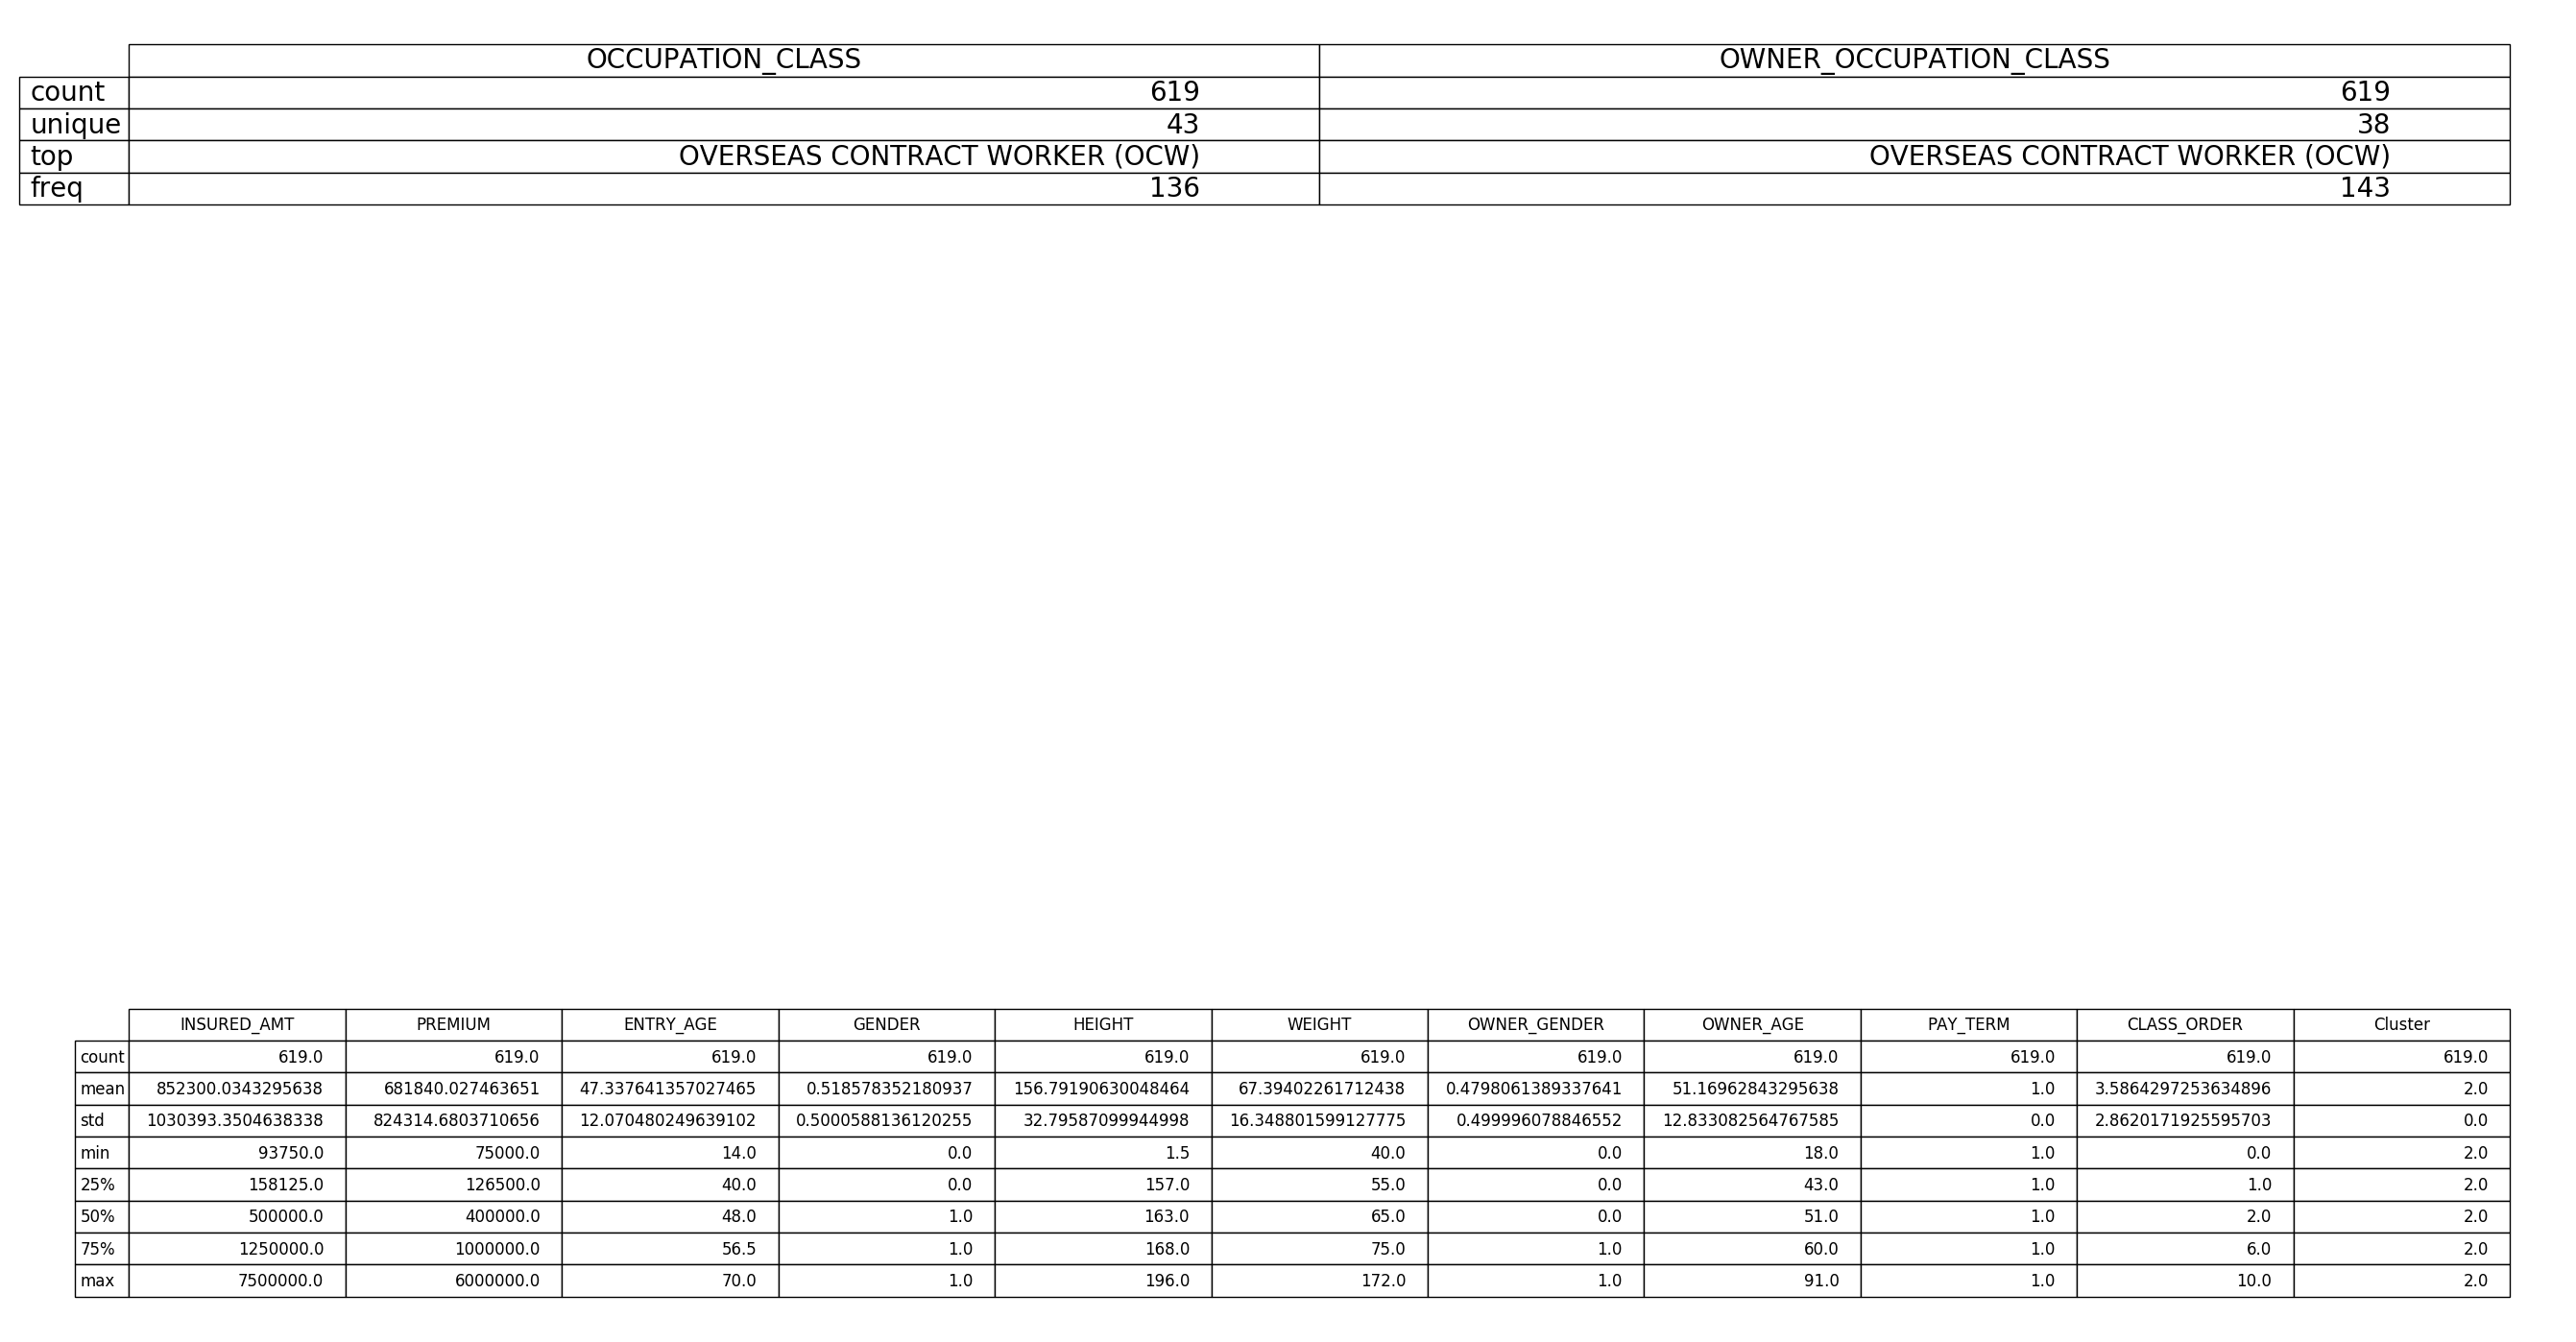

In [ ]:
from pandas.plotting import table
d_obj = df_cluster_n[df_cluster_n['Cluster'] == 2].describe(include=['object'])
d_= df_cluster_n[df_cluster_n['Cluster'] == 2].describe()
plot.rcParams['figure.dpi'] = 200
pl = plot.subplot(111, frame_on=False)

    #remove axis
pl.xaxis.set_visible(False) 
pl.yaxis.set_visible(False) 

#create the table plot and position it in the upper left corner
table(pl, d_obj,loc='upper right')

pl.figure.show();

table(pl, d_,loc='lower right')

pl.figure.show();

In [ ]:
#X = pd.get_dummies(df_cluster_n['OCCUPATION_CLASS'], prefix_sep='_', drop_first=True)

# PRODUCT PREDICTION

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
# df_

# X_train, X_test, y_train, y_test = train_test_split(df_, df_['PRODUCT_CATEGORY'], test_size=0.2)
# print(X_train.shape, y_train.shape)
# print(X_test.shape, y_test.shape)

# print(X_train.head(5))
# print(y_train.head(5))

df_['PROPOSAL_SUBMISSION_DATE'] =  pd.to_datetime(df_['PROPOSAL_SUBMISSION_DATE'], format='%m/%d/%Y', errors='coerce')
df_['ISSUE_DATE'] =  pd.to_datetime(df_['ISSUE_DATE'], format='%m/%d/%Y', errors='coerce')
df_['ST_DATE'] =  pd.to_datetime(df_['ST_DATE'], format='%m/%d/%Y', errors='coerce')
train, test = train_test_split(df_, test_size=0.2, random_state=10)
test.head(5)
basedate = pd.to_datetime('today')
df_['LAST_PURCHASED'] = df_['ISSUE_DATE'].apply(lambda x: (basedate - x).days)
#df_['LAST_PURCHASED']



In [ ]:
#train['PRODUCT_CATEGORY'] = train['PRODUCT_CATEGORY'].astype('category')
le = preprocessing.LabelEncoder()
#y = train['PRODUCT_CATEGORY'].values
y = le.fit_transform(train['PRODUCT_CATEGORY'])
Y_truth = test['PRODUCT_CATEGORY']
f_test = test.drop(['PRODUCT_CATEGORY','PROD_TYPE', 'PRODUCT_CODE', 'PRODUCT_NAME_L1','PRODUCT_NAME','BASIC_COVER_TYPE'], axis=1)
f_train = train.drop(['PRODUCT_CATEGORY','PROD_TYPE', 'PRODUCT_CODE', 'PRODUCT_NAME_L1','PRODUCT_NAME','BASIC_COVER_TYPE'], axis=1)
# print(le.inverse_transform(y)[46]) #- change back to label
# print(y[46])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)
#0: HEALTH
#1: INVESTMENT
#2: PROTECTION
#3: RETIREMENT
#4: SAVINGS



{'HEALTH': 0, 'INVESTMENT': 1, 'PROTECTION': 2, 'RETIREMENT': 3, 'SAVINGS': 4}


In [ ]:
f_test.shape

(4151, 33)

In [ ]:
f_test = f_test.reset_index(drop=True)
f_train = f_train.reset_index(drop=True)

In [ ]:
#set label

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
f_train_t = f_train[["INSURED_AMT","PREMIUM","ENTRY_AGE", "GENDER", "HEIGHT",\
                           "WEIGHT","OWNER_GENDER", "OWNER_AGE", "PAY_TERM",\
                           "CLASS_ORDER","LAST_PURCHASED"]]
f_test_t = f_test[["INSURED_AMT","PREMIUM","ENTRY_AGE", "GENDER", "HEIGHT",\
                           "WEIGHT","OWNER_GENDER", "OWNER_AGE", "PAY_TERM",\
                           "CLASS_ORDER", "LAST_PURCHASED"]]
index_tr = f_train_t.index
names_tr = f_train_t.columns
index_t = f_test_t.index
names_t = f_test_t.columns

f_train_t = sc.fit_transform(f_train_t)
f_test_t = sc.transform(f_test_t)
f_train_t = pd.DataFrame(f_train_t, index=index_tr, columns=names_tr)
f_test_t = pd.DataFrame(f_test_t, index=index_t, columns=names_t)




KeyError: ignored

In [ ]:
X_train = f_train
X_test = f_test
X_train[["INSURED_AMT","PREMIUM","ENTRY_AGE", "GENDER", "HEIGHT",\
                           "WEIGHT","OWNER_GENDER", "OWNER_AGE", "PAY_TERM",\
                           "CLASS_ORDER", "LAST_PURCHASED"]]\
        = f_train_t[["INSURED_AMT","PREMIUM","ENTRY_AGE", "GENDER", "HEIGHT",\
                           "WEIGHT","OWNER_GENDER", "OWNER_AGE", "PAY_TERM",\
                           "CLASS_ORDER", "LAST_PURCHASED"]]
X_test[["INSURED_AMT","PREMIUM","ENTRY_AGE", "GENDER", "HEIGHT",\
                           "WEIGHT","OWNER_GENDER", "OWNER_AGE", "PAY_TERM",\
                           "CLASS_ORDER", "LAST_PURCHASED"]]\
        = f_test_t[["INSURED_AMT","PREMIUM","ENTRY_AGE", "GENDER", "HEIGHT",\
                           "WEIGHT","OWNER_GENDER", "OWNER_AGE", "PAY_TERM",\
                           "CLASS_ORDER", "LAST_PURCHASED"]]
X_train =  X_train.drop(['PROPOSAL_SUBMISSION_DATE', 'ISSUE_DATE', 'ST_DATE'], axis=1)
X_test =  X_test.drop(['PROPOSAL_SUBMISSION_DATE', 'ISSUE_DATE', 'ST_DATE'], axis=1)


In [ ]:
X_test.shape

In [ ]:

X_train[X_train.select_dtypes(['object']).columns] = X_train.select_dtypes(['object']).apply(lambda x: x.astype('category'))
X_test[X_test.select_dtypes(['object']).columns] = X_test.select_dtypes(['object']).apply(lambda x: x.astype('category'))
cat_col = X_train.select_dtypes('category').columns.tolist()
cat_col

In [ ]:
d_train = lgb.Dataset(X_train, label=y)
params = {}
params['learning_rate'] = 0.003
params['boosting_type'] = 'gbdt'
params['objective'] = 'multiclass'
params['metric'] = 'multi_logloss'
params['sub_feature'] = 0.5
params['num_class'] = 5
clf = lgb.train(params, d_train, 1000)

In [ ]:
from sklearn.externals import joblib
# save model
joblib.dump(clf, 'lgb.pkl')
# load model
#gbm_pickle = joblib.load('lgb.pkl')

In [ ]:
out = clf.predict(X_test)
Y_predict = le.inverse_transform(np.argmax(out, axis=1))
Y_truth = test['PRODUCT_CATEGORY']
ids = X_test['BUYER_ID'].values
lbls = le.inverse_transform(y)
output = pd.DataFrame({'id': ids, 'PRODUCT_CATEGORY':Y_predict})
output.to_csv("submission.csv", index=True)

In [ ]:

print(np.argmax(out, axis=1))

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_predict, Y_truth)
accuracy

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_predict, Y_truth)
cm

# Cluster with categorical data using K Prototypes

In [ ]:
df_c = pd.read_csv('cluster.csv')
df_c.head(5)

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plot.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df_c['INSURED_AMT'], df_c['OWNER_GENDER'], df_c['Cluster'])
ax.set_xlabel('INSURED AMOUNT')
ax.set_ylabel('OWNER_GENDER')
ax.set_zlabel('CLUSTER')
plot.show();
